In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


In [4]:
#https://www.kaggle.com/asifpervezpolok/insurance-cost-prediction-88-1-r2-score

In [5]:
# read csv

In [6]:
df=pd.read_csv('insurance.csv')

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

In [13]:
LBM=LabelEncoder()
df['sex']=LBM.fit_transform(df['sex'])

In [14]:
df['smoker']=LBM.fit_transform(df['smoker'])
df['region']=LBM.fit_transform(df['region'])

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<AxesSubplot:>

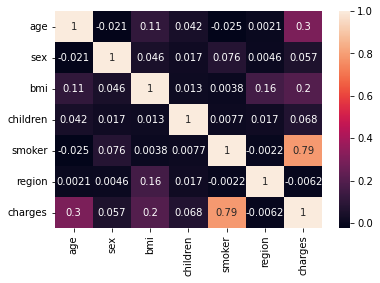

In [16]:
df.corr()
sns.heatmap(df.corr(),annot = True)

In [17]:
x=df.drop('charges',axis=1)
y=df['charges']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state =1)
linear_model = LinearRegression()

In [19]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = linear_model.predict(x_test)

In [21]:
y_pred_train = linear_model.predict(x_train)

In [22]:
r2_value = r2_score(y_test,y_pred)
print('R squared Value is  :',r2_value)

R squared Value is  : 0.762322402256339


In [23]:
r2_value_train = r2_score(y_train,y_pred_train)
print('R squared Value for Training Data is  :',r2_value_train)

R squared Value for Training Data is  : 0.7475615631933097


In [24]:
linear_model.score(x_test,y_test)

0.762322402256339

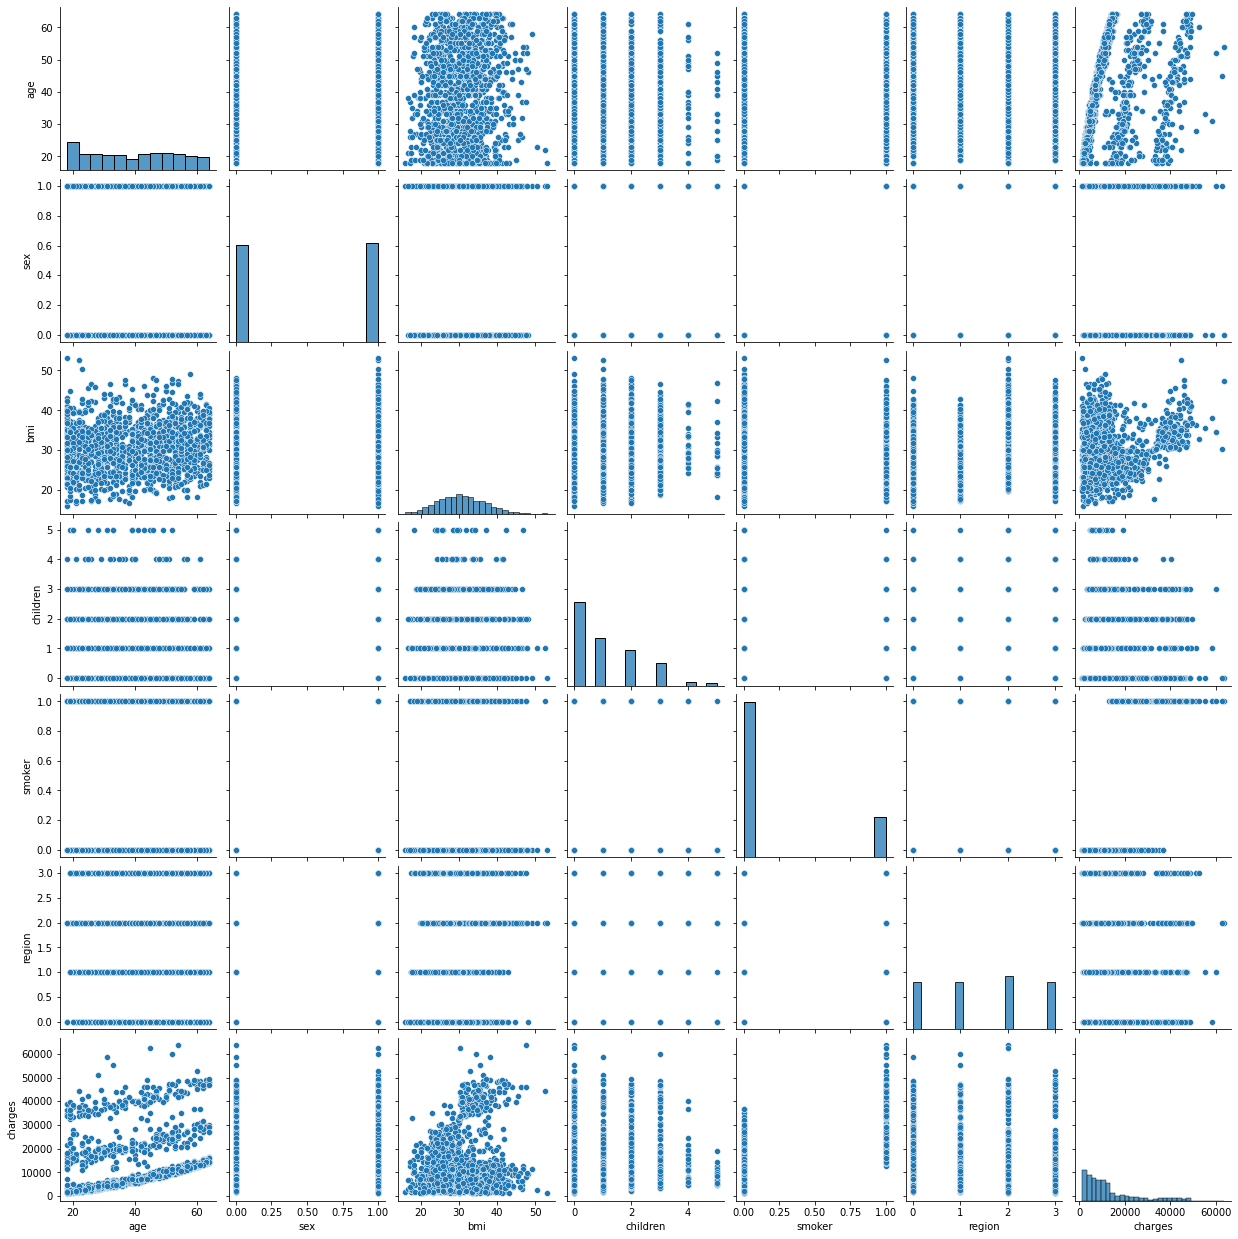

In [25]:
sns.pairplot(df,kind = 'scatter')

C:\Users\HOME\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

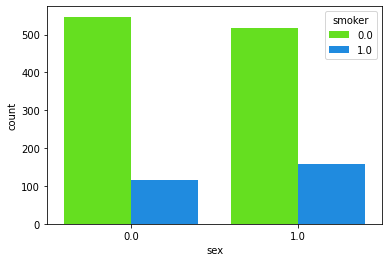

In [35]:
sns.countplot(df["sex"],hue=df["smoker"],palette="gist_rainbow")

In [26]:
# scalling  

C:\Users\HOME\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

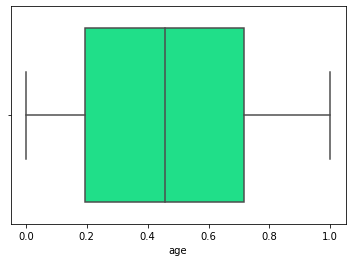

In [36]:
sns.boxplot(df["age"],palette="gist_rainbow")

C:\Users\HOME\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

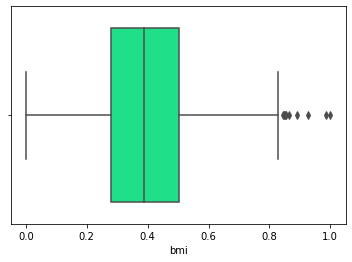

In [37]:
sns.boxplot(df["bmi"],palette="gist_rainbow")

In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [28]:
mn = MinMaxScaler()
nor_scaled = mn.fit_transform(df)
df = pd.DataFrame(nor_scaled,columns= df.columns)

In [29]:
df

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.333333,0.151299
1334,0.000000,0.0,0.429379,0.0,0.0,0.000000,0.017305
1335,0.000000,0.0,0.562012,0.0,0.0,0.666667,0.008108
1336,0.065217,0.0,0.264730,0.0,0.0,1.000000,0.014144


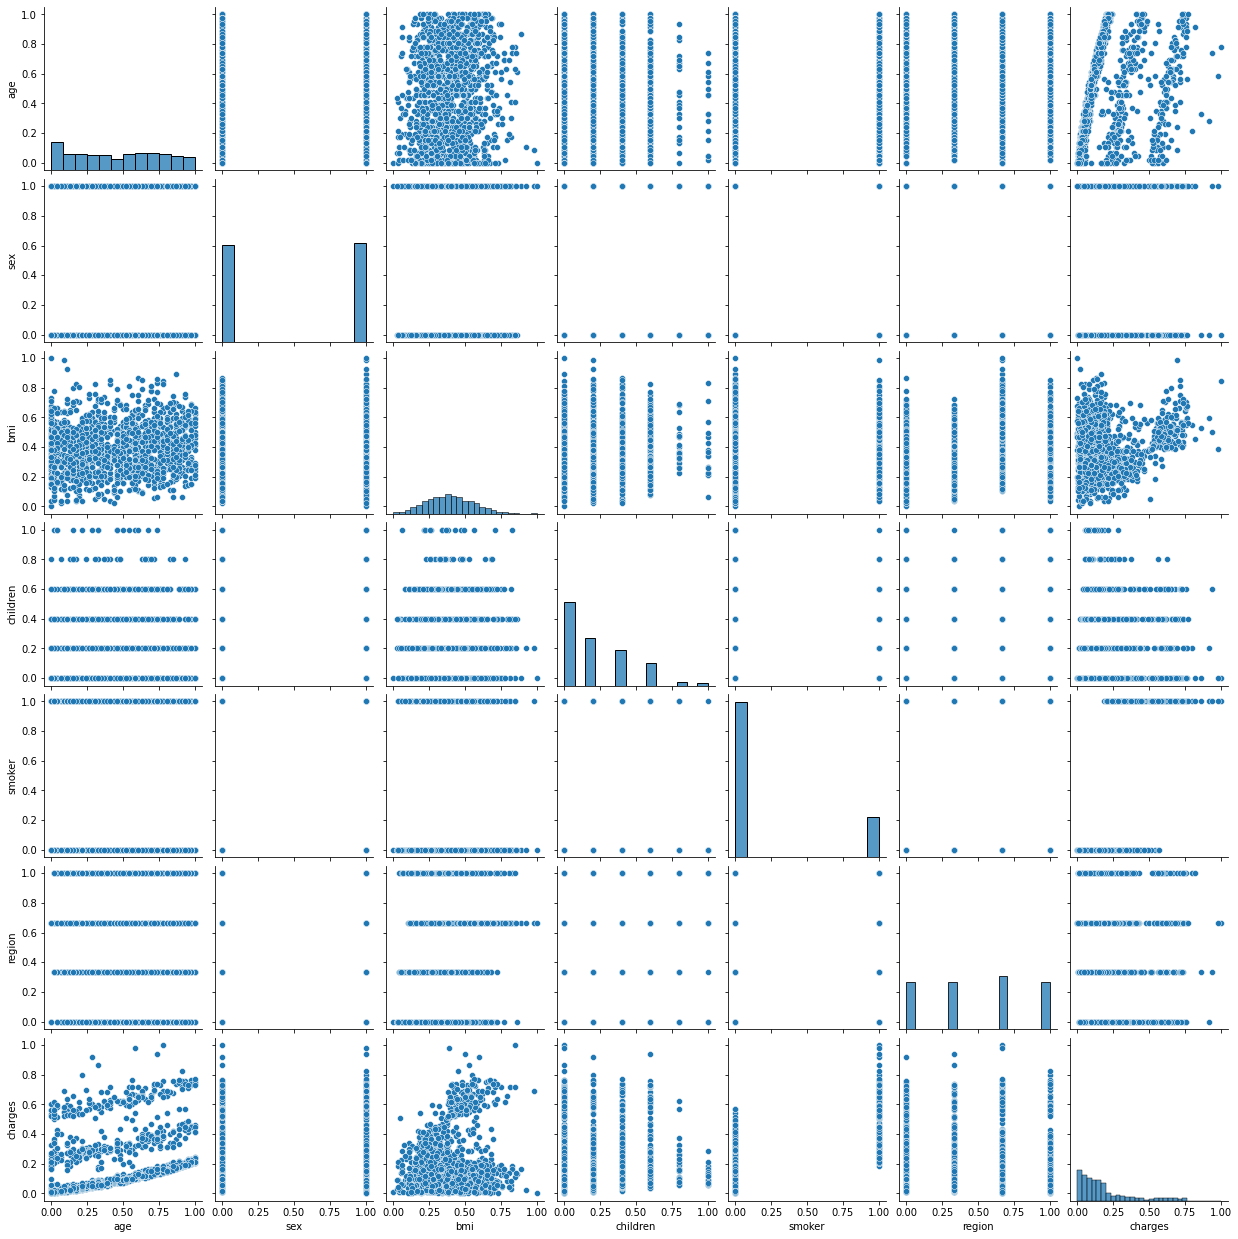

In [30]:
sns.pairplot(df,kind = 'scatter')

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state =1)
linear_model = LinearRegression()

In [32]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = linear_model.predict(x_test)

In [34]:
r2_value = r2_score(y_test,y_pred)
print('R squared Value is  :',r2_value)

R squared Value is  : 0.762322402256339


In [38]:
 print("MSE",mean_squared_error(y_test,y_pred))

MSE 35480663.81217907
